<div class="alert alert-block alert-info">
    <a href="https://www.linkedin.com/in/lopesflavia"><img alt="Flávia Lopes. Let's code :)" src="logo.png" width=250px, align="center"></a>
</div>

<div class="alert alert-block alert-info">
    <h1>Previsão da Nota de Matemática do Enem 2016</h1>
<div style="margin-top: 20px">    
    <ul>
        <li>Dicionário dos Microdados do Enem 2016:<br>
            <a href="https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip">https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip</a>
        </li>
        <li>Fonte dos dados:<br>
            <a href="https://s3-us-west-1.amazonaws.com/codenation-challenges/enem-ps/testfiles.zip">https://s3-us-west-1.amazonaws.com/codenation-challenges/enem-ps/testfiles.zip</a>
        </li>
        <li>Formato dos dados: csv
        </li>
        <li>Dados Faltantes: sim
        </li>
    </ul>
</div>
    <h2>Detalhes</h2>
    <ol>
        <li>Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.</li>
        <li>O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o Dicionário dos Microdados do Enem 2016.</li>
        <li>No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.
    Salve sua resposta em um arquivo chamado answer.csv com duas colunas: NU_INSCRICAO e NU_NOTA_MT.
    Faça o upload do arquivo answer.csv usando o botão “Submeter resposta”.</li>
    </ol>       
    <ul>
        <li>Lógica</li>
        <li>Análise de dados</li>
        <li>Estatística</li>
        <li>Regression</li>
    </ul>
</div>

<a id="contents"></a>
<h2>Tabela de Conteúdo</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#acquisition">Aquisição e Preparação dos Dados</a></li>
        <li><a href="#eda">Análise Exploratória de Dados: Visualização</a></li>
        <li><a href="#feature_engineering_1">Feature Engineering - Part 1</a>
        <ol>
            <li><a href="#anova">ANOVA</a></li>
            <li><a href="#selected_features">Features Selecinadas</a></li></ol>
        </li>       
        <li><a href="#feature_engineering_2">Feature Engineering - Part 2</a></li>
        <li><a href="#data_to_model">Preparando os Dados para o Modelo</a></li>
        <li><a href="#model_development_mlr">Do Modelo à Evaluação: MLR</a>  
            <ol>
                <li><a href="#evaluation_in">In-Sample Evaluation</a></li>
                <li><a href="#evaluation_out">Out-Sample Evaluation</a></li>
                <li><a href="#evaluation_visualization">Visualização: Y x Y^</a></li>
            </ol>
        </li>        
    </ol>
</div>
<hr>

<a  id="acquisition"></a>
<h2>Aquisição e Preparação dos Dados</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

<p>O problema deve ser resolvido com os dados fornecidos, conjuntos train e test. O conjunto test é para aplicar o modelo treinado, obter a previsão e submeter o resultado no desafio.
Veja que eles têm quantidades de colunas (features) diferentes. Significa que o modelo vai trabalhar com as features existentes em test, no máximo. Portanto já eliminamos 120 features (167 - 47 = 120).</p>
<p>Vamos ler do conjunto train apenas as colunas que estão em test.</p>

### Lendo os Dados

In [2]:
df_test = pd.read_csv('test.csv', na_values=np.nan)

df = pd.read_csv('train.csv', na_values=np.nan)
print('Shape de test.csv: {}\nShape de train.csv: {}'.format(df_test.shape, df.shape))

#remover de df o que não existe em df_test, exceto NU_NOTA_MT (target)
to_drop = list(set(df.columns).difference(set(df_test.columns)))
to_drop.remove('NU_NOTA_MT')
df.drop(to_drop, axis=1, inplace=True)
print('Shape de test.csv: {}\nShape de train.csv: {}'.format(df_test.shape, df.shape))

Shape de test.csv: (4576, 47)
Shape de train.csv: (13730, 167)
Shape de test.csv: (4576, 47)
Shape de train.csv: (13730, 48)


<h3> Missing Data</h3>

Se faltou ou foi reprovado na prova de Linguagens, então levou 0 na prova de matemática.
O mesmo raciocínio se estende para outras notas com dados faltantes cujo estado de TP_PRESENCA é 0 ou 2.

In [3]:
df.loc[df.TP_PRESENCA_LC == 0, 'NU_NOTA_MT' ] = 0
df.loc[df.TP_PRESENCA_LC == 2, 'NU_NOTA_MT' ] = 0

df_test.loc[df_test.TP_PRESENCA_LC == 0, 'NU_NOTA_LC' ] = 0
df_test.loc[df_test.TP_PRESENCA_LC == 2, 'NU_NOTA_LC' ] = 0
df.loc[df.TP_PRESENCA_LC == 0, 'NU_NOTA_LC' ] = 0
df.loc[df.TP_PRESENCA_LC == 2, 'NU_NOTA_LC' ] = 0

df_test.loc[df_test.TP_PRESENCA_CN == 0, 'NU_NOTA_CN' ] = 0
df_test.loc[df_test.TP_PRESENCA_CN == 2, 'NU_NOTA_CN' ] = 0
df.loc[df.TP_PRESENCA_CN == 0, 'NU_NOTA_CN' ] = 0
df.loc[df.TP_PRESENCA_CN == 2, 'NU_NOTA_CN' ] = 0

df_test.loc[df_test.TP_PRESENCA_CH == 0, 'NU_NOTA_CH' ] = 0
df_test.loc[df_test.TP_PRESENCA_CH == 2, 'NU_NOTA_CH' ] = 0
df.loc[df.TP_PRESENCA_CH == 0, 'NU_NOTA_CH' ] = 0
df.loc[df.TP_PRESENCA_CH == 2, 'NU_NOTA_CH' ] = 0

df_test.loc[df_test.TP_PRESENCA_LC == 0, 'NU_NOTA_REDACAO' ] = 0
df_test.loc[df_test.TP_PRESENCA_LC == 2, 'NU_NOTA_REDACAO' ] = 0 
df.loc[df.TP_PRESENCA_LC == 0, 'NU_NOTA_REDACAO' ] = 0
df.loc[df.TP_PRESENCA_LC == 2, 'NU_NOTA_REDACAO' ] = 0 

df_test.loc[df_test.TP_PRESENCA_LC == 0, ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3','NU_NOTA_COMP2', 'NU_NOTA_COMP1']] = 0
df_test.loc[df_test.TP_PRESENCA_LC == 2, ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3','NU_NOTA_COMP2', 'NU_NOTA_COMP1']] = 0
df.loc[df.TP_PRESENCA_LC == 0, ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3','NU_NOTA_COMP2', 'NU_NOTA_COMP1']] = 0
df.loc[df.TP_PRESENCA_LC == 2, ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3','NU_NOTA_COMP2', 'NU_NOTA_COMP1']] = 0

In [4]:
nu_missing = df.isnull().sum().sort_values(ascending=False).copy()
nu_percent = df.isnull().sum() / df.isnull().count().copy()

total_df = pd.concat([nu_missing, nu_percent], axis=1, keys=['Total', 'Percent'], sort=True).sort_values(by='Total', ascending=False)
total_df = total_df[total_df['Total'] > 0]

nu_missing = df_test.isnull().sum().sort_values(ascending=False).copy()
nu_percent = df_test.isnull().sum() / df_test.isnull().count().copy()

total_df_test = pd.concat([nu_missing, nu_percent], axis=1, keys=['Total', 'Percent'], sort=True).sort_values(by='Total', ascending=False)
total_df_test = total_df_test[total_df_test['Total'] > 0]


more_than_15_percent = total_df[total_df['Percent'] > 0.15].index.tolist()
to_drop = list(set(more_than_15_percent))
df.drop(to_drop, axis=1, inplace=True)

more_than_15_percent = total_df_test[total_df_test['Percent'] > 0.15].index.tolist()
to_drop = list(set(more_than_15_percent))
df_test.drop(to_drop, axis=1, inplace=True)

print('\nDados faltantes do treino - Antes da exclusão\n')
print(total_df)
print('\nDados faltantes do teste - Antes da exclusão\n')
print(total_df_test)


Dados faltantes do treino - Antes da exclusão

                        Total   Percent
TP_ENSINO                9448  0.688128
TP_DEPENDENCIA_ADM_ESC   9448  0.688128
Q027                     7373  0.536999
TP_STATUS_REDACAO        3597  0.261981

Dados faltantes do teste - Antes da exclusão

                        Total   Percent
TP_DEPENDENCIA_ADM_ESC   3096  0.676573
TP_ENSINO                3096  0.676573
Q027                     2488  0.543706
TP_STATUS_REDACAO        1199  0.262019


In [5]:
(df.isnull().sum()).any(), (df_test.isnull().sum()).any()

(False, False)

### astype('category')

- Converter variáveis categóricas para tipo 'category' salva memória:
    - Redução de 3.6+MB para 1.3MB

In [6]:
df.dtypes

NU_INSCRICAO         object
CO_UF_RESIDENCIA      int64
SG_UF_RESIDENCIA     object
NU_IDADE              int64
TP_SEXO              object
TP_COR_RACA           int64
TP_NACIONALIDADE      int64
TP_ST_CONCLUSAO       int64
TP_ANO_CONCLUIU       int64
TP_ESCOLA             int64
IN_TREINEIRO          int64
IN_BAIXA_VISAO        int64
IN_CEGUEIRA           int64
IN_SURDEZ             int64
IN_DISLEXIA           int64
IN_DISCALCULIA        int64
IN_SABATISTA          int64
IN_GESTANTE           int64
IN_IDOSO              int64
TP_PRESENCA_CN        int64
TP_PRESENCA_CH        int64
TP_PRESENCA_LC        int64
CO_PROVA_CN          object
CO_PROVA_CH          object
CO_PROVA_LC          object
CO_PROVA_MT          object
NU_NOTA_CN          float64
NU_NOTA_CH          float64
NU_NOTA_LC          float64
NU_NOTA_MT          float64
TP_LINGUA             int64
NU_NOTA_COMP1       float64
NU_NOTA_COMP2       float64
NU_NOTA_COMP3       float64
NU_NOTA_COMP4       float64
NU_NOTA_COMP5       

In [7]:
to_categorical = df.dtypes[(df.dtypes == 'int') | (df.dtypes == 'object')].index.values
for it in to_categorical:
    df.loc[:, it] = df.loc[:, it].astype('category')
    
to_categorical = df_test.dtypes[(df_test.dtypes == 'int') | (df_test.dtypes == 'object')].index.values
for it in to_categorical:
    df_test.loc[:, it] = df_test.loc[:, it].astype('category')

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="eda"></a>
<h2>Análise Exploratória de Dados: Visualização</h2>

<p>Com o FacetGrid podemos ver a distribuição das notas em relação aos grupos das variável observada.</p>
Vamos usar a média das Notas para ter um parâmetro:

In [8]:
xlim = tuple([df.NU_NOTA_MT.min(),df.NU_NOTA_MT.max()])
xticks = [0, 409, 461, 538, 952]
df.NU_NOTA_MT.describe()

count    13730.000000
mean       356.092607
std        228.844193
min          0.000000
25%          0.000000
50%        422.500000
75%        504.400000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

In [9]:
#Veja descrição das features por categoria
feature = 'NU_NOTA_REDACAO'
group = df[['NU_NOTA_MT',feature]].groupby(feature).describe()
group
group['NU_NOTA_MT']['mean'].sort_values(ascending=False).reset_index().head()

,NU_NOTA_REDACAO,mean
0,980.0,761.900000
1,920.0,653.432692
2,940.0,648.761765
3,960.0,647.764286
4,1000.0,632.000000


In [10]:
from IPython.display import display
from ipywidgets import interact_manual
import ipywidgets as widgets

def facet_grid(facet_feature, target_feature):
    g = sns.FacetGrid(df, col=facet_feature, col_wrap=2, height=4, aspect=1.5, sharex=False, legend_out=False)
    g.map(plt.hist, target_feature).set(
        xlim=xlim,
        xticks= xticks
    )
    
_ = interact_manual(facet_grid,
                    facet_feature = df,
                    target_feature = widgets.widget_string.Label('NU_NOTA_MT')
                   )

interactive(children=(Dropdown(description='facet_feature', options=('NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_U…

In [11]:
df.NU_NOTA_MT.describe()

count    13730.000000
mean       356.092607
std        228.844193
min          0.000000
25%          0.000000
50%        422.500000
75%        504.400000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

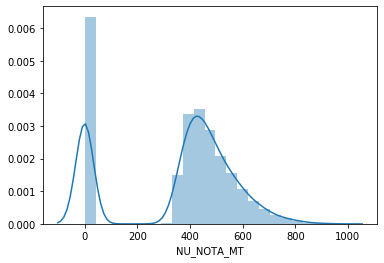

In [12]:
#histogram
sns.distplot(df.NU_NOTA_MT);


<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="feature_engineering_1"></a>

<h2>Feature Engineering - Part 1</h2>

Vamos analisar as variáveis de notas e ver se podemos fazer alguma transformação:
- NU_NOTA_MT, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC e NU_NOTA_REDACAO	

In [13]:
temp = df[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']].copy()
pesos = [2, 1, 1.5, 3]
temp['TOTAL_PARCIAL'] = (temp.values[:,1:5] * pesos).sum(axis=1) / sum(pesos)
temp['NU_NOTA_DIA1'] = (temp.values[:,1:3] * pesos[0:2]).sum(axis=1) / sum(pesos[0:2])
temp['NU_NOTA_DIA2_PARCIAL'] = (temp.values[:,3:5] * pesos[2:]).sum(axis=1) / sum(pesos[2:])
temp.corr()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TOTAL_PARCIAL,NU_NOTA_DIA1,NU_NOTA_DIA2_PARCIAL
NU_NOTA_MT,1.000000,0.907039,0.903608,0.943954,0.875929,0.934712,0.912263,0.915306
NU_NOTA_CN,0.907039,1.000000,0.969323,0.920917,0.857810,0.953313,0.996080,0.895280
NU_NOTA_CH,0.903608,0.969323,1.000000,0.934704,0.871199,0.958907,0.987264,0.909072
NU_NOTA_LC,0.943954,0.920917,0.934704,1.000000,0.904795,0.966805,0.932435,0.953226
NU_NOTA_REDACAO,0.875929,0.857810,0.871199,0.904795,1.000000,0.967367,0.868736,0.991190
TOTAL_PARCIAL,0.934712,0.953313,0.958907,0.966805,0.967367,1.000000,0.962114,0.987314
NU_NOTA_DIA1,0.912263,0.996080,0.987264,0.932435,0.868736,0.962114,1.000000,0.906618
NU_NOTA_DIA2_PARCIAL,0.915306,0.895280,0.909072,0.953226,0.991190,0.987314,0.906618,1.000000


Pode ser interessante fazer um teste e substituir as variáveis de notas por notas do dia, respeitando o cálculo de média ponderada do Enem. 
- NU_NOTA_MT, NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC e NU_NOTA_REDACAO: 
    - (NU_NOTA_DIA1 e NU_NOTA_DIA2_PARCIAL) ou
    - TOTAL_PARCIAL

### Investigando variáveis

####  NU_IDADE, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU (descartar)
<label><input type="checkbox">  NU_IDADE:</label> 
    - NU_IDADE: TP_ST_CONCLUSAO em relação à idade.
    - Conclusão: criar variável separando idade em 3 categorias: (0,16], (16,18], (18,25], (25,66] 
<label><input type="checkbox">  TP_ST_CONCLUSAO:</label> 
    - TP_ST_CONCLUSAO: aplicar map: {4:1, 3:2, 2:3, 1:4}
        
#### Q001, Q002
<label><input type="checkbox">  Q001 e Q002:</label> Categorias: A e B = 1, H = 2, C e D = 3, E = 4, F = 5, G = 6. 
#### Q006
<label><input type="checkbox">  Q006:</label> Reagrupamento de categorias e conversão para numéricas (duas em duas), exceto Q.
#### Q047
<label><input type="checkbox">  Q047:</label> Reordenamento e conversão para numéricas de acordo com ranqueamento da média de NU_NOTA_MT
    
<br><hr>

In [14]:
temp = df[['TP_ST_CONCLUSAO','NU_IDADE']].copy().astype(int)
temp = temp.groupby('TP_ST_CONCLUSAO')['NU_IDADE']
temp.describe()

,count,mean,std,min,25%,50%,75%,max
TP_ST_CONCLUSAO,,,,,,,,
1,6524.0,24.598099,7.630657,16.0,19.0,22.0,27.0,67.0
2,4283.0,18.388513,3.513885,15.0,17.0,18.0,18.0,59.0
3,2306.0,17.360798,3.510246,13.0,16.0,17.0,17.0,56.0
4,617.0,27.897893,9.127752,14.0,21.0,25.0,33.0,65.0


In [15]:
df['NU_IDADE_CATEGORY'] = pd.cut(df.NU_IDADE, [0,16,18,25,67], labels=[1,2,3,4])
df.NU_IDADE_CATEGORY.value_counts()

3    5073
2    4908
4    2437
1    1312
Name: NU_IDADE_CATEGORY, dtype: int64

In [16]:
df_test['NU_IDADE_CATEGORY'] = pd.cut(df_test.NU_IDADE, [0,16,18,25,67], labels=[1,2,3,4])
df_test.NU_IDADE_CATEGORY.value_counts()

3    1686
2    1649
4     823
1     418
Name: NU_IDADE_CATEGORY, dtype: int64

In [17]:
temp = df[['TP_ST_CONCLUSAO','NU_NOTA_MT']].copy().astype(int)
temp = temp.groupby('TP_ST_CONCLUSAO')['NU_NOTA_MT']
temp.describe()

,count,mean,std,min,25%,50%,75%,max
TP_ST_CONCLUSAO,,,,,,,,
1,6524.0,327.109902,246.612076,0.0,0.0,413.0,503.0,935.0
2,4283.0,407.491478,194.341346,0.0,379.0,439.0,516.0,952.0
3,2306.0,378.354293,203.395358,0.0,365.0,427.0,499.0,895.0
4,617.0,215.160454,234.419853,0.0,0.0,0.0,443.0,681.0


In [18]:
df.TP_ST_CONCLUSAO = df.TP_ST_CONCLUSAO.map({4:1,3:2,2:3,1:4})
df.TP_ST_CONCLUSAO.value_counts()


4    6524
3    4283
2    2306
1     617
Name: TP_ST_CONCLUSAO, dtype: int64

In [19]:
df_test.TP_ST_CONCLUSAO = df_test.TP_ST_CONCLUSAO.map({4:1,3:2,2:3,1:4})
df_test.TP_ST_CONCLUSAO.value_counts()


4    2128
3    1480
2     764
1     204
Name: TP_ST_CONCLUSAO, dtype: int64

In [20]:
temp = df[['Q001','NU_NOTA_MT']].copy()
temp.groupby('Q001')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
Q001,,,,,,,,
A,934.0,290.369165,219.922946,0.0,0.000,393.30,452.375,701.4
B,3309.0,317.184467,221.120509,0.0,0.000,403.80,470.400,819.8
C,2146.0,350.173206,221.297752,0.0,0.000,419.35,496.575,895.5
D,1733.0,352.419388,226.311109,0.0,0.000,422.90,499.700,862.5
E,3079.0,392.880286,226.145958,0.0,364.550,447.70,537.200,916.6
F,719.0,470.869680,232.302155,0.0,410.850,520.10,622.400,935.1
G,354.0,480.247740,254.046839,0.0,408.725,534.65,666.150,952.0
H,1456.0,335.114973,220.182430,0.0,0.000,408.60,481.125,897.0


In [21]:
df.Q001 = df.Q001.replace('A', 1).replace('B',1).replace('H',2).replace('C',3).replace('D',3).replace('E',4).replace('F',5).replace('G',6)
df.Q001.value_counts()

1    4243
3    3879
4    3079
2    1456
5     719
6     354
Name: Q001, dtype: int64

In [22]:
df_test.Q001 = df_test.Q001.replace('A', 1).replace('B',1).replace('H',2).replace('C',3).replace('D',3).replace('E',4).replace('F',5).replace('G',6)
df_test.Q001.value_counts()

1    1411
3    1288
4     988
2     537
5     239
6     113
Name: Q001, dtype: int64

In [23]:
temp = df[['Q002','NU_NOTA_MT']].copy()
temp.groupby('Q002')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
Q002,,,,,,,,
A,643.0,265.117885,223.424458,0.0,0.000,375.30,441.75,794.4
B,2627.0,306.881804,220.892372,0.0,0.000,398.80,463.70,851.0
C,2162.0,334.646300,221.715825,0.0,0.000,413.60,483.40,895.5
D,2083.0,342.634229,225.138757,0.0,0.000,417.30,493.90,908.8
E,3883.0,381.378161,224.509905,0.0,356.250,442.10,525.90,935.1
F,964.0,469.963382,221.931991,0.0,415.575,499.60,614.70,952.0
G,648.0,474.965278,220.476586,0.0,404.850,503.55,630.85,868.2
H,720.0,324.411389,219.280332,0.0,0.000,404.65,467.85,897.0


In [24]:
df.Q002 = df.Q002.replace('A', 1).replace('B',1).replace('H',2).replace('C',3).replace('D',3).replace('E',4).replace('F',5).replace('G',6)
df.Q002.value_counts()


3    4245
4    3883
1    3270
5     964
2     720
6     648
Name: Q002, dtype: int64

In [25]:
df_test.Q002 = df_test.Q002.replace('A', 1).replace('B',1).replace('H',2).replace('C',3).replace('D',3).replace('E',4).replace('F',5).replace('G',6)
df_test.Q002.value_counts()


3    1436
4    1302
1    1083
5     307
2     240
6     208
Name: Q002, dtype: int64

In [26]:
temp = df[['Q006','NU_NOTA_MT']].copy()
temp.groupby('Q006')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
Q006,,,,,,,,
A,491.0,301.232587,220.822728,0.0,0.000,392.10,451.900,840.9
B,4264.0,332.438039,207.209400,0.0,0.000,407.20,468.500,800.2
C,3641.0,329.317715,226.158232,0.0,0.000,413.80,486.600,896.3
D,1636.0,344.026284,232.372639,0.0,0.000,426.00,506.400,895.5
E,1028.0,367.003502,231.437298,0.0,0.000,427.00,523.300,952.0
F,667.0,383.779910,239.669104,0.0,335.350,442.70,549.550,874.1
G,642.0,402.330530,237.088261,0.0,371.175,469.45,552.850,829.1
H,433.0,457.927483,224.677898,0.0,407.700,507.20,600.700,877.6
I,253.0,484.933597,218.121805,0.0,423.800,518.40,636.400,895.4


In [27]:
df.Q006 = df.Q006.replace(
    ['A','B'], 1).replace(
    ['C','D'], 2).replace(
    ['E','F'], 3).replace(
    ['G','H'], 4).replace(
    ['I','J'], 5).replace(
    ['K','L'], 6).replace(
    ['M','N'], 7).replace(
    ['O','P'], 8).replace('Q',9)
df.Q006.value_counts()

2    5277
1    4755
3    1695
4    1075
5     418
6     158
7     152
8     134
9      66
Name: Q006, dtype: int64

In [28]:
df_test.Q006 = df_test.Q006.replace(
    ['A','B'], 1).replace(
    ['C','D'], 2).replace(
    ['E','F'], 3).replace(
    ['G','H'], 4).replace(
    ['I','J'], 5).replace(
    ['K','L'], 6).replace(
    ['M','N'], 7).replace(
    ['O','P'], 8).replace('Q',9)
df_test.Q006.value_counts()

2    1706
1    1636
3     566
4     350
5     161
6      54
7      42
8      40
9      21
Name: Q006, dtype: int64

In [29]:
temp = df[['Q047','NU_NOTA_MT']].copy()
temp.groupby('Q047')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
Q047,,,,,,,,
A,11726.0,337.160856,222.106337,0.0,0.00,414.05,487.075,916.6
B,348.0,361.149138,247.004564,0.0,0.00,433.90,537.200,807.8
C,162.0,381.777160,229.652813,0.0,349.35,445.65,527.675,765.2
D,1173.0,508.501620,223.038511,0.0,434.50,552.20,660.300,952.0
E,321.0,472.283801,228.519142,0.0,415.50,503.00,612.100,908.8


In [30]:
df.Q047 = df.Q047.replace('A', 1).replace('B', 3).replace('C', 2).replace('D', 5).replace('E', 4)
df.Q047.value_counts()

1    11726
5     1173
3      348
4      321
2      162
Name: Q047, dtype: int64

In [31]:
df_test.Q047 = df_test.Q047.replace('A', 1).replace('B', 3).replace('C', 2).replace('D', 5).replace('E', 4)
df_test.Q047.value_counts()

1    3913
5     396
3     106
4      90
2      71
Name: Q047, dtype: int64

In [32]:
temp = df[['TP_NACIONALIDADE','NU_NOTA_MT']].copy()
temp.groupby('TP_NACIONALIDADE')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_NACIONALIDADE,,,,,,,,
0,13.0,344.607692,199.476972,0.0,389.700,431.80,466.600,521.7
1,13121.0,358.346277,228.816862,0.0,0.000,423.60,506.800,952.0
2,548.0,299.677007,222.455767,0.0,0.000,400.15,459.375,724.9
3,8.0,439.287500,319.478340,0.0,283.050,433.45,682.500,840.8
4,40.0,376.820000,221.364350,0.0,362.325,428.05,519.300,752.5


In [33]:
df.TP_NACIONALIDADE = df.TP_NACIONALIDADE.map({0:1, 1:3, 2:2, 3:5,4:4})
df.TP_NACIONALIDADE.value_counts()

3    13121
2      548
4       40
1       13
5        8
Name: TP_NACIONALIDADE, dtype: int64

In [34]:
df_test.TP_NACIONALIDADE = df_test.TP_NACIONALIDADE.map({0:1, 1:3, 2:2, 3:5,4:4})
df_test.TP_NACIONALIDADE.value_counts()

3    4324
2     230
4      14
5       5
1       3
Name: TP_NACIONALIDADE, dtype: int64

In [35]:
temp = df[['TP_COR_RACA','NU_NOTA_MT']].copy()
temp.groupby('TP_COR_RACA')['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_COR_RACA,,,,,,,,
0,241.0,344.212448,246.020475,0.0,0.0,409.9,497.70,857.9
1,4589.0,383.315581,238.776759,0.0,341.9,442.5,542.30,952.0
2,1794.0,338.196042,221.555351,0.0,0.0,416.7,485.05,916.6
3,6693.0,343.581100,221.025909,0.0,0.0,415.3,487.70,909.5
4,312.0,358.315385,235.290804,0.0,0.0,425.5,502.45,928.5
5,101.0,287.670297,227.877316,0.0,0.0,396.4,453.10,712.6


In [36]:
df.TP_COR_RACA = df.TP_COR_RACA.map({5:1, 2:2, 3:2,  0:3, 4:3, 1:4})
df.TP_COR_RACA.value_counts()

2    8487
4    4589
3     553
1     101
Name: TP_COR_RACA, dtype: int64

In [37]:
df_test.TP_COR_RACA = df_test.TP_COR_RACA.map({5:1, 2:2, 3:2,  0:3, 4:3, 1:4})
df_test.TP_COR_RACA.value_counts()

2    2791
4    1536
3     215
1      34
Name: TP_COR_RACA, dtype: int64

Após algumas transformações vamos analizar outras variáveis categóricas sem ordem. Com o objetivo de diminuir as categorias vamos analizá-las em relação à média de NU_NOTA_MT para cada categoria. Vamos utilizar uma técnica: ***bucket category***.

In [38]:
def bucket(feature, data):
    bucket = data[['NU_NOTA_MT', feature]].groupby(
        feature
    ).mean().sort_values(by='NU_NOTA_MT',ascending=False)
    return bucket

In [39]:
bucket('Q026', df)

,NU_NOTA_MT
Q026,
A,403.291365
C,305.169228
B,302.669023


In [40]:
df['Q026'] = df.Q026.replace('A', 2).replace('B', 1).replace('C',1)
df_test['Q026'] = df_test.Q026.replace('A', 2).replace('B', 1).replace('C',1)

In [41]:
bucket('CO_PROVA_CH',df)

,NU_NOTA_MT
CO_PROVA_CH,
f94e97c2a5689edd5369740fde9a927e23a9465f,499.454237
f48d390ab6a2428e659c37fb8a9d00afde621889,474.882478
0fb4772fc6ee9b951ade2fbe6699cc37985c422e,471.526154
9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,471.235185
909237ab0d84688e10c0470e2997348aff585273,470.031301
942ab3dc020af4cf53740b6b07e9dd7060b24164,468.843810
c95541bf218d7ff70572ca4bcb421edeff05c6d5,467.850000
6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,452.771212
d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,375.100000


In [42]:
df['CO_PROVA_CH'] = df.CO_PROVA_CH.replace(
    'f94e97c2a5689edd5369740fde9a927e23a9465f', 8).replace(
    'f48d390ab6a2428e659c37fb8a9d00afde621889', 7).replace(
    '0fb4772fc6ee9b951ade2fbe6699cc37985c422e', 6).replace(
    '9cd70f1b922e02bd33453b3f607f5a644fb9b1b8', 6).replace(
    '909237ab0d84688e10c0470e2997348aff585273', 5).replace(
    '942ab3dc020af4cf53740b6b07e9dd7060b24164', 4).replace(
    'c95541bf218d7ff70572ca4bcb421edeff05c6d5', 4).replace(
    '6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93', 3).replace(
    'd5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [43]:
df_test['CO_PROVA_CH'] = df_test.CO_PROVA_CH.replace(
    'f94e97c2a5689edd5369740fde9a927e23a9465f', 8).replace(
    'f48d390ab6a2428e659c37fb8a9d00afde621889', 7).replace(
    '0fb4772fc6ee9b951ade2fbe6699cc37985c422e', 6).replace(
    '9cd70f1b922e02bd33453b3f607f5a644fb9b1b8', 6).replace(
    '909237ab0d84688e10c0470e2997348aff585273', 5).replace(
    '942ab3dc020af4cf53740b6b07e9dd7060b24164', 4).replace(
    'c95541bf218d7ff70572ca4bcb421edeff05c6d5', 4).replace(
    '6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93', 3).replace(
    'd5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [44]:
bucket('CO_PROVA_CN',df)

,NU_NOTA_MT
CO_PROVA_CN,
03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,499.454237
c8328ebc6f3238e06076c481bc1b82b8301e7a3f,474.882478
c87a85497686b3e7b3765f84a2ca95256f0f66aa,471.526154
16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,471.235185
b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,470.031301
66b1dad288e13be0992bae01e81f71eca1c6e8a6,468.843810
69ed2ddcb151cfebe3d2ae372055335ac7c8c144,467.850000
1bcdece8fb1b952552b319e4e5512bbcf540e338,452.771212
a27a1efea095c8a973496f0b57a24ac6775d95b0,375.100000


In [45]:
df['CO_PROVA_CN'] = df.CO_PROVA_CN.replace(
    '03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2', 8).replace(
    'c8328ebc6f3238e06076c481bc1b82b8301e7a3f', 7).replace(
    'c87a85497686b3e7b3765f84a2ca95256f0f66aa', 6).replace(
    '16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2', 6).replace(
    'b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7', 5).replace(
    '66b1dad288e13be0992bae01e81f71eca1c6e8a6', 4).replace(
    '69ed2ddcb151cfebe3d2ae372055335ac7c8c144', 4).replace(
    '1bcdece8fb1b952552b319e4e5512bbcf540e338', 3).replace(
    'a27a1efea095c8a973496f0b57a24ac6775d95b0', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [46]:
df_test['CO_PROVA_CN'] = df_test.CO_PROVA_CN.replace(
    '03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2', 8).replace(
    'c8328ebc6f3238e06076c481bc1b82b8301e7a3f', 7).replace(
    'c87a85497686b3e7b3765f84a2ca95256f0f66aa', 6).replace(
    '16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2', 6).replace(
    'b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7', 5).replace(
    '66b1dad288e13be0992bae01e81f71eca1c6e8a6', 4).replace(
    '69ed2ddcb151cfebe3d2ae372055335ac7c8c144', 4).replace(
    '1bcdece8fb1b952552b319e4e5512bbcf540e338', 3).replace(
    'a27a1efea095c8a973496f0b57a24ac6775d95b0', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [47]:
bucket('CO_PROVA_MT',df)

,NU_NOTA_MT
CO_PROVA_MT,
0e0082361eaceb6418bb17305a2b7912650b4783,494.676119
81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,491.035575
73c5c86eef8f70263e4c5708d153cca123f93378,485.358730
767a32545304ed293242d528f54d4edb1369f910,481.320601
97caab1e1533dba217deb7ef41490f52e459ab01,480.557179
577f8968d95046f5eb5cc158608e12fa9ba34c85,477.770533
6d6961694e839531aec2d35bbd8552b55394a0d7,477.229630
0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,457.146875
2d22ac1d42e6187f09ee6c578df187a760123ccf,0.000000


In [48]:
df['CO_PROVA_MT'] = df.CO_PROVA_MT.replace(
    '0e0082361eaceb6418bb17305a2b7912650b4783', 8).replace(
    '81d0ee00ef42a7c23eb04496458c03d4c5b9c31a', 7).replace(
    '73c5c86eef8f70263e4c5708d153cca123f93378', 6).replace(
    '767a32545304ed293242d528f54d4edb1369f910', 5).replace(
    '97caab1e1533dba217deb7ef41490f52e459ab01', 4).replace(
    '577f8968d95046f5eb5cc158608e12fa9ba34c85', 3).replace(
    '6d6961694e839531aec2d35bbd8552b55394a0d7', 3).replace(
    '0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [49]:
df_test['CO_PROVA_MT'] = df_test.CO_PROVA_MT.replace(
    '0e0082361eaceb6418bb17305a2b7912650b4783', 8).replace(
    '81d0ee00ef42a7c23eb04496458c03d4c5b9c31a', 7).replace(
    '73c5c86eef8f70263e4c5708d153cca123f93378', 6).replace(
    '767a32545304ed293242d528f54d4edb1369f910', 5).replace(
    '97caab1e1533dba217deb7ef41490f52e459ab01', 4).replace(
    '577f8968d95046f5eb5cc158608e12fa9ba34c85', 3).replace(
    '6d6961694e839531aec2d35bbd8552b55394a0d7', 3).replace(
    '0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [50]:
bucket('CO_PROVA_LC',df)

,NU_NOTA_MT
CO_PROVA_LC,
fa86b01f07636b15adfd66b688c79934730721a6,494.676119
01abbb7f1a90505385f44eec9905f82ca2a42cfd,491.035575
481058938110a64a272266e3892102b8ef0ca96f,485.358730
5aebe5cad7fabc1545ac7fba07a4e6177f98483c,481.320601
01af53cd161a420fff1767129c10de560cc264dd,480.557179
72f80e4b3150c627c7ffc93cfe0fa13a9989b610,477.770533
44b09b311799bd684b3d02463bfa99e472c6adb3,477.229630
9cbf6bf31d9d89a64ce2737ece4834fde4a95029,457.146875
2d22ac1d42e6187f09ee6c578df187a760123ccf,0.000000


In [51]:
df['CO_PROVA_LC'] = df.CO_PROVA_LC.replace(
    'fa86b01f07636b15adfd66b688c79934730721a6', 8).replace(
    '01abbb7f1a90505385f44eec9905f82ca2a42cfd', 7).replace(
    '481058938110a64a272266e3892102b8ef0ca96f', 6).replace(
    '5aebe5cad7fabc1545ac7fba07a4e6177f98483c', 5).replace(
    '01af53cd161a420fff1767129c10de560cc264dd', 4).replace(
    '72f80e4b3150c627c7ffc93cfe0fa13a9989b610', 3).replace(
    '44b09b311799bd684b3d02463bfa99e472c6adb3', 3).replace(
    '9cbf6bf31d9d89a64ce2737ece4834fde4a95029', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [52]:
df_test['CO_PROVA_LC'] = df_test.CO_PROVA_LC.replace(
    'fa86b01f07636b15adfd66b688c79934730721a6', 8).replace(
    '01abbb7f1a90505385f44eec9905f82ca2a42cfd', 7).replace(
    '481058938110a64a272266e3892102b8ef0ca96f', 6).replace(
    '5aebe5cad7fabc1545ac7fba07a4e6177f98483c', 5).replace(
    '01af53cd161a420fff1767129c10de560cc264dd', 4).replace(
    '72f80e4b3150c627c7ffc93cfe0fa13a9989b610', 3).replace(
    '44b09b311799bd684b3d02463bfa99e472c6adb3', 3).replace(
    '9cbf6bf31d9d89a64ce2737ece4834fde4a95029', 2).replace(
    '2d22ac1d42e6187f09ee6c578df187a760123ccf', 1)

In [53]:
bucket('SG_UF_RESIDENCIA', df)

,NU_NOTA_MT
SG_UF_RESIDENCIA,
SE,400.317486
SC,378.532967
PB,373.248418
ES,373.038235
MG,372.647889
AL,368.122381
TO,367.189222
PI,364.963014
PA,363.490404


In [54]:
estados = {'SE': 23, 'SC': 22, 'PB': 21, 'ES': 21, 'MG': 20, 'AL': 19,
           'TO': 18, 'PI': 17, 'PA': 16, 'SP': 16, 'GO': 15, 'MA': 14,
           'DF': 14, 'RN': 14, 'CE': 13, 'PE': 12, 'RO': 11, 'PR': 10,
           'RJ': 9, 'BA': 8, 'RS': 7, 'MT': 6, 'AC': 5, 'MS': 4, 'RR': 3, 'AP': 2, 'AM': 1}
df['SG_UF_RESIDENCIA_BUCKET'] = df.SG_UF_RESIDENCIA.map(estados)
df_test['SG_UF_RESIDENCIA_BUCKET'] = df_test.SG_UF_RESIDENCIA.map(estados)

In [55]:
bucket('Q024',df)

,NU_NOTA_MT
Q024,
E,519.801031
D,499.272727
C,449.689942
B,368.077503
A,322.436843


In [56]:
df['Q024_BUCKET'] = df.Q024.replace(
    'E', 5).replace(
    'D', 4).replace(
    'C', 3).replace(
    'B', 2).replace(
    'A', 1)
df['Q024_BUCKET'].value_counts()

2    6441
1    6107
3     865
4     220
5      97
Name: Q024_BUCKET, dtype: int64

In [57]:
df_test['Q024_BUCKET'] = df_test.Q024.replace(
    'E', 5).replace(
    'D', 4).replace(
    'C', 3).replace(
    'B', 2).replace(
    'A', 1)
df_test['Q024_BUCKET'].value_counts()

2    2144
1    2047
3     283
4      78
5      24
Name: Q024_BUCKET, dtype: int64

Após análises preliminares na seção de exploração e visualização dos dados concluímos que algumas features já podem ser descartadas:
- NU_INSCRICAO: não agrega ao modelo, mas é importante para a exportação do resultado no final.
- IN_CEGUEIRA: tem apenas um grupo, 0 (ausente de cegueira)
- TP_PRESENCA_LC: está atrelada à existencia de NU_NOTA_MT (prova de matemática e linguagens foram no mesmo dia)
- CO_UF_RESIDENCIA: redundante. SG_UF_RESIDENCIA pode substituir
- TP_ESCOLA é redundante: Q047
- NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5: são contínuas, mas já estão presentes na variável NU_NOTA_REDACAO
- TP_ANO_CONCLUIU é direcionada apenas a quem já concluiu, TP_ST_CONCLUSAO 1 (ou 4, após conversão).
- NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_REDACAO: aplicar suas features transformadas.

In [58]:
#Criando feature DIA1
df['NU_NOTA_DIA1'] = (df.loc[:, ['NU_NOTA_CN', 'NU_NOTA_CH']] * [2, 1]).sum(axis=1) / sum([2, 1])
df_test['NU_NOTA_DIA1'] = (df_test.loc[:, ['NU_NOTA_CN', 'NU_NOTA_CH']] * [2, 1]).sum(axis=1) / sum([2, 1])

#Criando feature DIA2_PARCIAL
df['NU_NOTA_DIA2_PARCIAL'] = (df.loc[:, ['NU_NOTA_LC', 'NU_NOTA_REDACAO']] * [1.5, 3]).sum(axis=1) / sum([1.5, 3])
df_test['NU_NOTA_DIA2_PARCIAL'] = (df_test.loc[:, ['NU_NOTA_LC', 'NU_NOTA_REDACAO']] * [1.5, 3]).sum(axis=1) / sum([1.5, 3])

#features que serão descartadas do modelo
to_remove_v1 = np.array([
    'IN_CEGUEIRA',
    'TP_PRESENCA_LC',
    'CO_UF_RESIDENCIA', 
    'TP_ESCOLA',
    'NU_NOTA_COMP1', 
    'NU_NOTA_COMP2', 
    'NU_NOTA_COMP3', 
    'NU_NOTA_COMP4', 
    'NU_NOTA_COMP5',     
    'TP_ANO_CONCLUIU',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_CN',
    'NU_NOTA_CH'
    ])


<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="anova"></a>
<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our NU_NOTA_MT variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [59]:
df.drop(to_remove_v1, axis=1, inplace=True)
df_test.drop(to_remove_v1, axis=1, inplace=True)

In [60]:
#para o notebook ficar mais resumido os testes anovas estão no arquivo AnovaTest.py
from AnovaTest import AnovaTest as tt
a = tt(df, df.columns).run()

In [61]:
anova_test = pd.DataFrame(
    data=a, 
    columns=['feature', 'F-score', 'P-value']
).set_index(
    'feature'
).sort_values('P-value', ascending=True)

In [62]:
anova_test

,F-score,P-value
feature,,
TP_PRESENCA_CN,23385.847289,0.000000e+00
CO_PROVA_MT,12040.792058,0.000000e+00
CO_PROVA_LC,12040.792058,0.000000e+00
CO_PROVA_CH,6677.109436,0.000000e+00
CO_PROVA_CN,6677.109436,0.000000e+00
TP_PRESENCA_CH,23385.847289,0.000000e+00
NU_IDADE,27.460394,1.510596e-250
NU_IDADE_CATEGORY,402.029226,2.511613e-250
Q002,148.695721,2.993109e-154


In [63]:
anova_test[(anova_test['P-value'] < 0.001) & (anova_test['F-score'] > 100)].index

Index(['TP_PRESENCA_CN', 'CO_PROVA_MT', 'CO_PROVA_LC', 'CO_PROVA_CH',
       'CO_PROVA_CN', 'TP_PRESENCA_CH', 'NU_IDADE_CATEGORY', 'Q002', 'Q047',
       'Q026', 'TP_ST_CONCLUSAO', 'Q001', 'Q024_BUCKET', 'Q025', 'TP_LINGUA'],
      dtype='object', name='feature')

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="selected_features"></a>
<h3>Features Selecionadas</h3>


In [64]:
selected_features_df = ['NU_INSCRICAO','NU_IDADE_CATEGORY', 'Q002', 'Q047', 'Q026', 'TP_ST_CONCLUSAO', 'Q001',
     'Q024_BUCKET', 'Q025', 'TP_LINGUA','NU_NOTA_DIA1', 'NU_NOTA_DIA2_PARCIAL','NU_NOTA_MT']

#todas, exceto NU_NOTA_MT, pois não existe neste dataset ;)
selected_features_df_test = selected_features_df.copy()
selected_features_df_test.remove('NU_NOTA_MT')

In [65]:
data_to_model = df.loc[:,selected_features_df].copy()
data_to_test = df_test.loc[:, selected_features_df_test].copy()

In [66]:
data_to_model.dtypes, data_to_test.dtypes

(NU_INSCRICAO            category
 NU_IDADE_CATEGORY       category
 Q002                       int64
 Q047                       int64
 Q026                       int64
 TP_ST_CONCLUSAO            int64
 Q001                       int64
 Q024_BUCKET                int64
 Q025                    category
 TP_LINGUA               category
 NU_NOTA_DIA1             float64
 NU_NOTA_DIA2_PARCIAL     float64
 NU_NOTA_MT               float64
 dtype: object, NU_INSCRICAO            category
 NU_IDADE_CATEGORY       category
 Q002                       int64
 Q047                       int64
 Q026                       int64
 TP_ST_CONCLUSAO            int64
 Q001                       int64
 Q024_BUCKET                int64
 Q025                    category
 TP_LINGUA               category
 NU_NOTA_DIA1             float64
 NU_NOTA_DIA2_PARCIAL     float64
 dtype: object)

Ven diagram<!--
%%HTML
<svg width="800" height="380">  
  <circle cx="320" cy="200" r="160" fill-opacity="0.2" stroke="black" stroke-width="2" fill="yellow" />
  <circle cx="380" cy="250" r="60" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="250" cy="250" r="60" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <circle cx="320" cy="120" r="60" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <text  x="200" y="250" font-family="Verdana" font-size="18">categoricals</text>
  <text  x="350" y="250" font-family="Verdana" font-size="18">to_remove</text>
  <text  x="280" y="120" font-family="Verdana" font-size="18">continuous</text>   
  <text  x="550" y="185" font-family="Verdana" font-size="18">All features</text>   
  <line x1="430" y1="125" x2="550" y2="180" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
</svg>
-->

In [67]:
print('shape antes da seleção: {}\nshape após seleção: {}'.format(df.shape, data_to_model.shape))
print('\nForam {} features removidas.'.format(df.shape[1]-data_to_model.shape[1]))

shape antes da seleção: (13730, 35)
shape após seleção: (13730, 13)

Foram 22 features removidas.


<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="feature_engineering_2"></a>
<h2>Feature Engineering - Part 2</h2>

In [68]:
#features binárias
binaries = ['TP_LINGUA','Q025']

In [69]:
data_to_model = pd.concat([data_to_model, pd.get_dummies(data_to_model[binaries], drop_first=True)], axis=1)
data_to_model.drop(binaries, axis=1, inplace=True)

data_to_test = pd.concat([data_to_test, pd.get_dummies(data_to_test[binaries], drop_first=True)], axis=1)
data_to_test.drop(binaries, axis=1, inplace=True)

In [70]:
to_int = data_to_model.iloc[:, 1:].dtypes[data_to_model.iloc[:, 1:].dtypes == 'category'].index
for it in to_int:
    data_to_model[it] = data_to_model[it].astype(int)

to_int = data_to_test.iloc[:, 1:].dtypes[data_to_test.iloc[:, 1:].dtypes == 'category'].index
for it in to_int:
    data_to_test[it] = data_to_test[it].astype(int)

In [71]:
data_to_model.dtypes, data_to_test.dtypes

(NU_INSCRICAO            category
 NU_IDADE_CATEGORY          int64
 Q002                       int64
 Q047                       int64
 Q026                       int64
 TP_ST_CONCLUSAO            int64
 Q001                       int64
 Q024_BUCKET                int64
 NU_NOTA_DIA1             float64
 NU_NOTA_DIA2_PARCIAL     float64
 NU_NOTA_MT               float64
 TP_LINGUA_1                uint8
 Q025_B                     uint8
 dtype: object, NU_INSCRICAO            category
 NU_IDADE_CATEGORY          int64
 Q002                       int64
 Q047                       int64
 Q026                       int64
 TP_ST_CONCLUSAO            int64
 Q001                       int64
 Q024_BUCKET                int64
 NU_NOTA_DIA1             float64
 NU_NOTA_DIA2_PARCIAL     float64
 TP_LINGUA_1                uint8
 Q025_B                     uint8
 dtype: object)

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="data_to_model"></a>
<h2>Preparando os Dados para o Modelo</h2>

<p>Obs.: Nesta primeira versão não irei normalizar.</p>

simple_featuring_scaling = lambda x: x / x.max()

min_max = lambda x: x - x.min() / x.max() - x.min()

z_score = lambda x: x - x.mean() / x.std()

In [72]:
#apenas colocando o target na última coluna
data_to_model = pd.concat([data_to_model.drop('NU_NOTA_MT', axis=1), data_to_model['NU_NOTA_MT']], axis=1)

In [73]:
#salvando uma cópia em csv dos dados prontos para o modelo.
data_to_model.iloc[:, 1:].to_csv('data-to-model.csv', index=False)

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="model_development_mlr"></a>
<h2>Do Modelo à Evaluação: MLR</h2>

In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [75]:
data_to_model.columns

Index(['NU_INSCRICAO', 'NU_IDADE_CATEGORY', 'Q002', 'Q047', 'Q026',
       'TP_ST_CONCLUSAO', 'Q001', 'Q024_BUCKET', 'NU_NOTA_DIA1',
       'NU_NOTA_DIA2_PARCIAL', 'TP_LINGUA_1', 'Q025_B', 'NU_NOTA_MT'],
      dtype='object')

In [76]:
y = data_to_model.loc[:, 'NU_NOTA_MT'].copy()
X = data_to_model.drop(['NU_INSCRICAO', 'NU_NOTA_MT'], axis=1).copy()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a id="measures_in"></a>
<h3>In-Sample Evaluation</h3>

In [78]:
lm_insample = LinearRegression()
lm_insample.fit(x_train, y_train)
yhat_insample = lm_insample.predict(x_train)

In [79]:
r_squared = r2_score(y_train, yhat_insample)
mse = mean_squared_error(y_train, yhat_insample)

print('R2-score: ', r_squared)
print('MSE of G3 and predicted value is: ', mse)

print('*' * 10)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train - yhat_insample)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_train - yhat_insample) ** 2))

R2-score:  0.87775375674249
MSE of G3 and predicted value is:  6399.192047452645
**********
Mean absolute error: 54.46
Residual sum of squares (MSE): 6399.192


<a id="measures_out"></a>
<h3>Out-Sample Evaluation</h3>

In [80]:
lm_outsample = LinearRegression()
lm_outsample.fit(x_train, y_train)
yhat_outsample = lm_outsample.predict(x_test)

In [81]:
r_squared = r2_score(y_test, yhat_outsample)
mse = mean_squared_error(y_test, yhat_outsample)

print('R2-score: ', r_squared)
print('MSE of G3 and predicted value is: ', mse)

print('*' * 10)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_outsample)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_test - yhat_outsample) ** 2))

R2-score:  0.874772005457924
MSE of G3 and predicted value is:  6566.742940616837
**********
Mean absolute error: 55.72
Residual sum of squares (MSE): 6566.743


In [82]:
scores = cross_val_score(lm_outsample, X, y, cv=4)

In [83]:
print('scores: {}\nscores mean: {}'.format(scores, scores.mean()))

scores: [0.87579963 0.87620413 0.87977713 0.87558004]
scores mean: 0.8768402332293304


<a id="measures_visualization"></a>
<h3>Visualização: Y x Y^</h3>

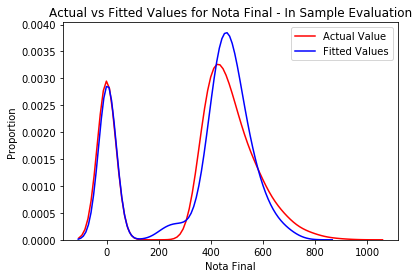

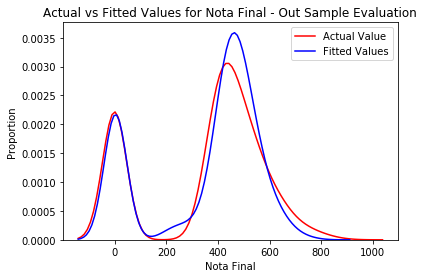

In [84]:
plt.figure()

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_insample, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Nota Final - In Sample Evaluation')
plt.xlabel('Nota Final')
plt.ylabel('Proportion')

plt.show()
#plt.savefig('in_sample.png',transparent = True)
plt.close()
######################
plt.figure()

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_outsample, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Nota Final - Out Sample Evaluation')
plt.xlabel('Nota Final')
plt.ylabel('Proportion')

plt.show()
#plt.savefig('out_sample.png',transparent = True)
plt.close()

<div class="alert alert-block alert-success"> Neste ponto o modelo foi treinado e testado. Agora vamos aplicá-lo ao conjunto test.csv, previamente tratado como data_to_test, e obter as predições. Estas serão unidas aos seus números de inscrições e exportadas para answer.csv.</div>

In [85]:
data_to_test.columns, data_to_model.columns

(Index(['NU_INSCRICAO', 'NU_IDADE_CATEGORY', 'Q002', 'Q047', 'Q026',
        'TP_ST_CONCLUSAO', 'Q001', 'Q024_BUCKET', 'NU_NOTA_DIA1',
        'NU_NOTA_DIA2_PARCIAL', 'TP_LINGUA_1', 'Q025_B'],
       dtype='object'),
 Index(['NU_INSCRICAO', 'NU_IDADE_CATEGORY', 'Q002', 'Q047', 'Q026',
        'TP_ST_CONCLUSAO', 'Q001', 'Q024_BUCKET', 'NU_NOTA_DIA1',
        'NU_NOTA_DIA2_PARCIAL', 'TP_LINGUA_1', 'Q025_B', 'NU_NOTA_MT'],
       dtype='object'))

In [86]:
data_to_test['NU_NOTA_MT'] = lm_outsample.predict(data_to_test.iloc[:, 1:12])

In [87]:
data_to_test.loc[:, ['NU_INSCRICAO', 'NU_NOTA_MT']].to_csv('answer.csv', index=False)

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<h3 style="color:blue; text-align:center;padding-top:50px;">Uma ano aguardando a aceleração de Data Science da Codenation sair. Finalmente!</h3>
<div class="alert alert-block">
    <img src="score.png" align="center">
</div>